In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [34]:
#create a dataset for predict breast cancer survival status.
df_survival = pd.read_csv('survival_prediction_dataset.csv')
df_survival.head()

Age  Sex  T_Stage  N_Stage  6th_Stage  Differentiated  Grade  A_Stage  \
0  1.574258    0        0        0          0               1      3        1   
1 -0.445222    0        1        1          2               0      2        1   
2  0.452325    0        2        2          4               0      2        1   
3  0.452325    0        0        0          0               1      3        1   
4 -0.781802    0        1        0          1               1      3        1   

   Tumor_Size  Estrogen_Status  Progesterone_Status  Regional_Node_Examined  \
0   -1.508826                1                    1                1.540617   
1    0.634794                1                    1                0.135463   
2    2.570968                1                    1                0.135463   
3   -0.540740                1                    1               -1.550721   
4    1.049689                1                    1               -1.410206   

   Reginol_Node_Positive  Survival_Months  
0              -0.777956        -0.598224  
1               1.430524        -0.505220  
2               2.534764         0.099306  
3              -0.777956         0.517825  
4              -0.777956        -1.063245

In [35]:
# The inputs are all the variables in the data assigned to X except the Survival_Months, hence dropped
x = df_survival.drop(columns=['Survival_Months'],axis =1)
# The output is the Survival_Months variable assigned to y
y = df_survival['Survival_Months']

In [36]:
#import the decission tree regression model
from sklearn.tree import DecisionTreeRegressor
#split the dataset into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
#Build a fully growth decision tree regressor model
re_model = DecisionTreeRegressor()
#train the model
re_model.fit(x_train, y_train)
#make a prediction on the test data
y_pred_re = re_model.predict(x_test)


In [38]:
#visualize the decision tree
from sklearn import tree
unpurned_tree_fig = plt.figure(figsize=(100, 100))
unpurned_tree_fig_graph = tree.plot_tree(re_model, filled=True, feature_names=list(x_train.columns))

In [39]:
#full depth of the tree
print("Full depth of the tree:", re_model.get_depth())

Full depth of the tree: 34


In [40]:
#evaluate the model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred_re)
# Calculate the R-squared score
r2 = r2_score(y_test, y_pred_re)
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred_re)
# calculate the root mean squared error
rmse = np.sqrt(mse)
# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 1.1157991693536373
Mean Squared Error: 1.949311464488331
R-squared Score: -0.8763728764285477
Root Mean Squared Error: 1.3961774473498456


In [41]:
#build a pruned decision tree regressor model
re_model_pruned = DecisionTreeRegressor(max_depth=4)
#train the model
re_model_pruned.fit(x_train, y_train)
#make a prediction on the test data
y_pred_re_pruned = re_model_pruned.predict(x_test)

Full depth of the tree: 4


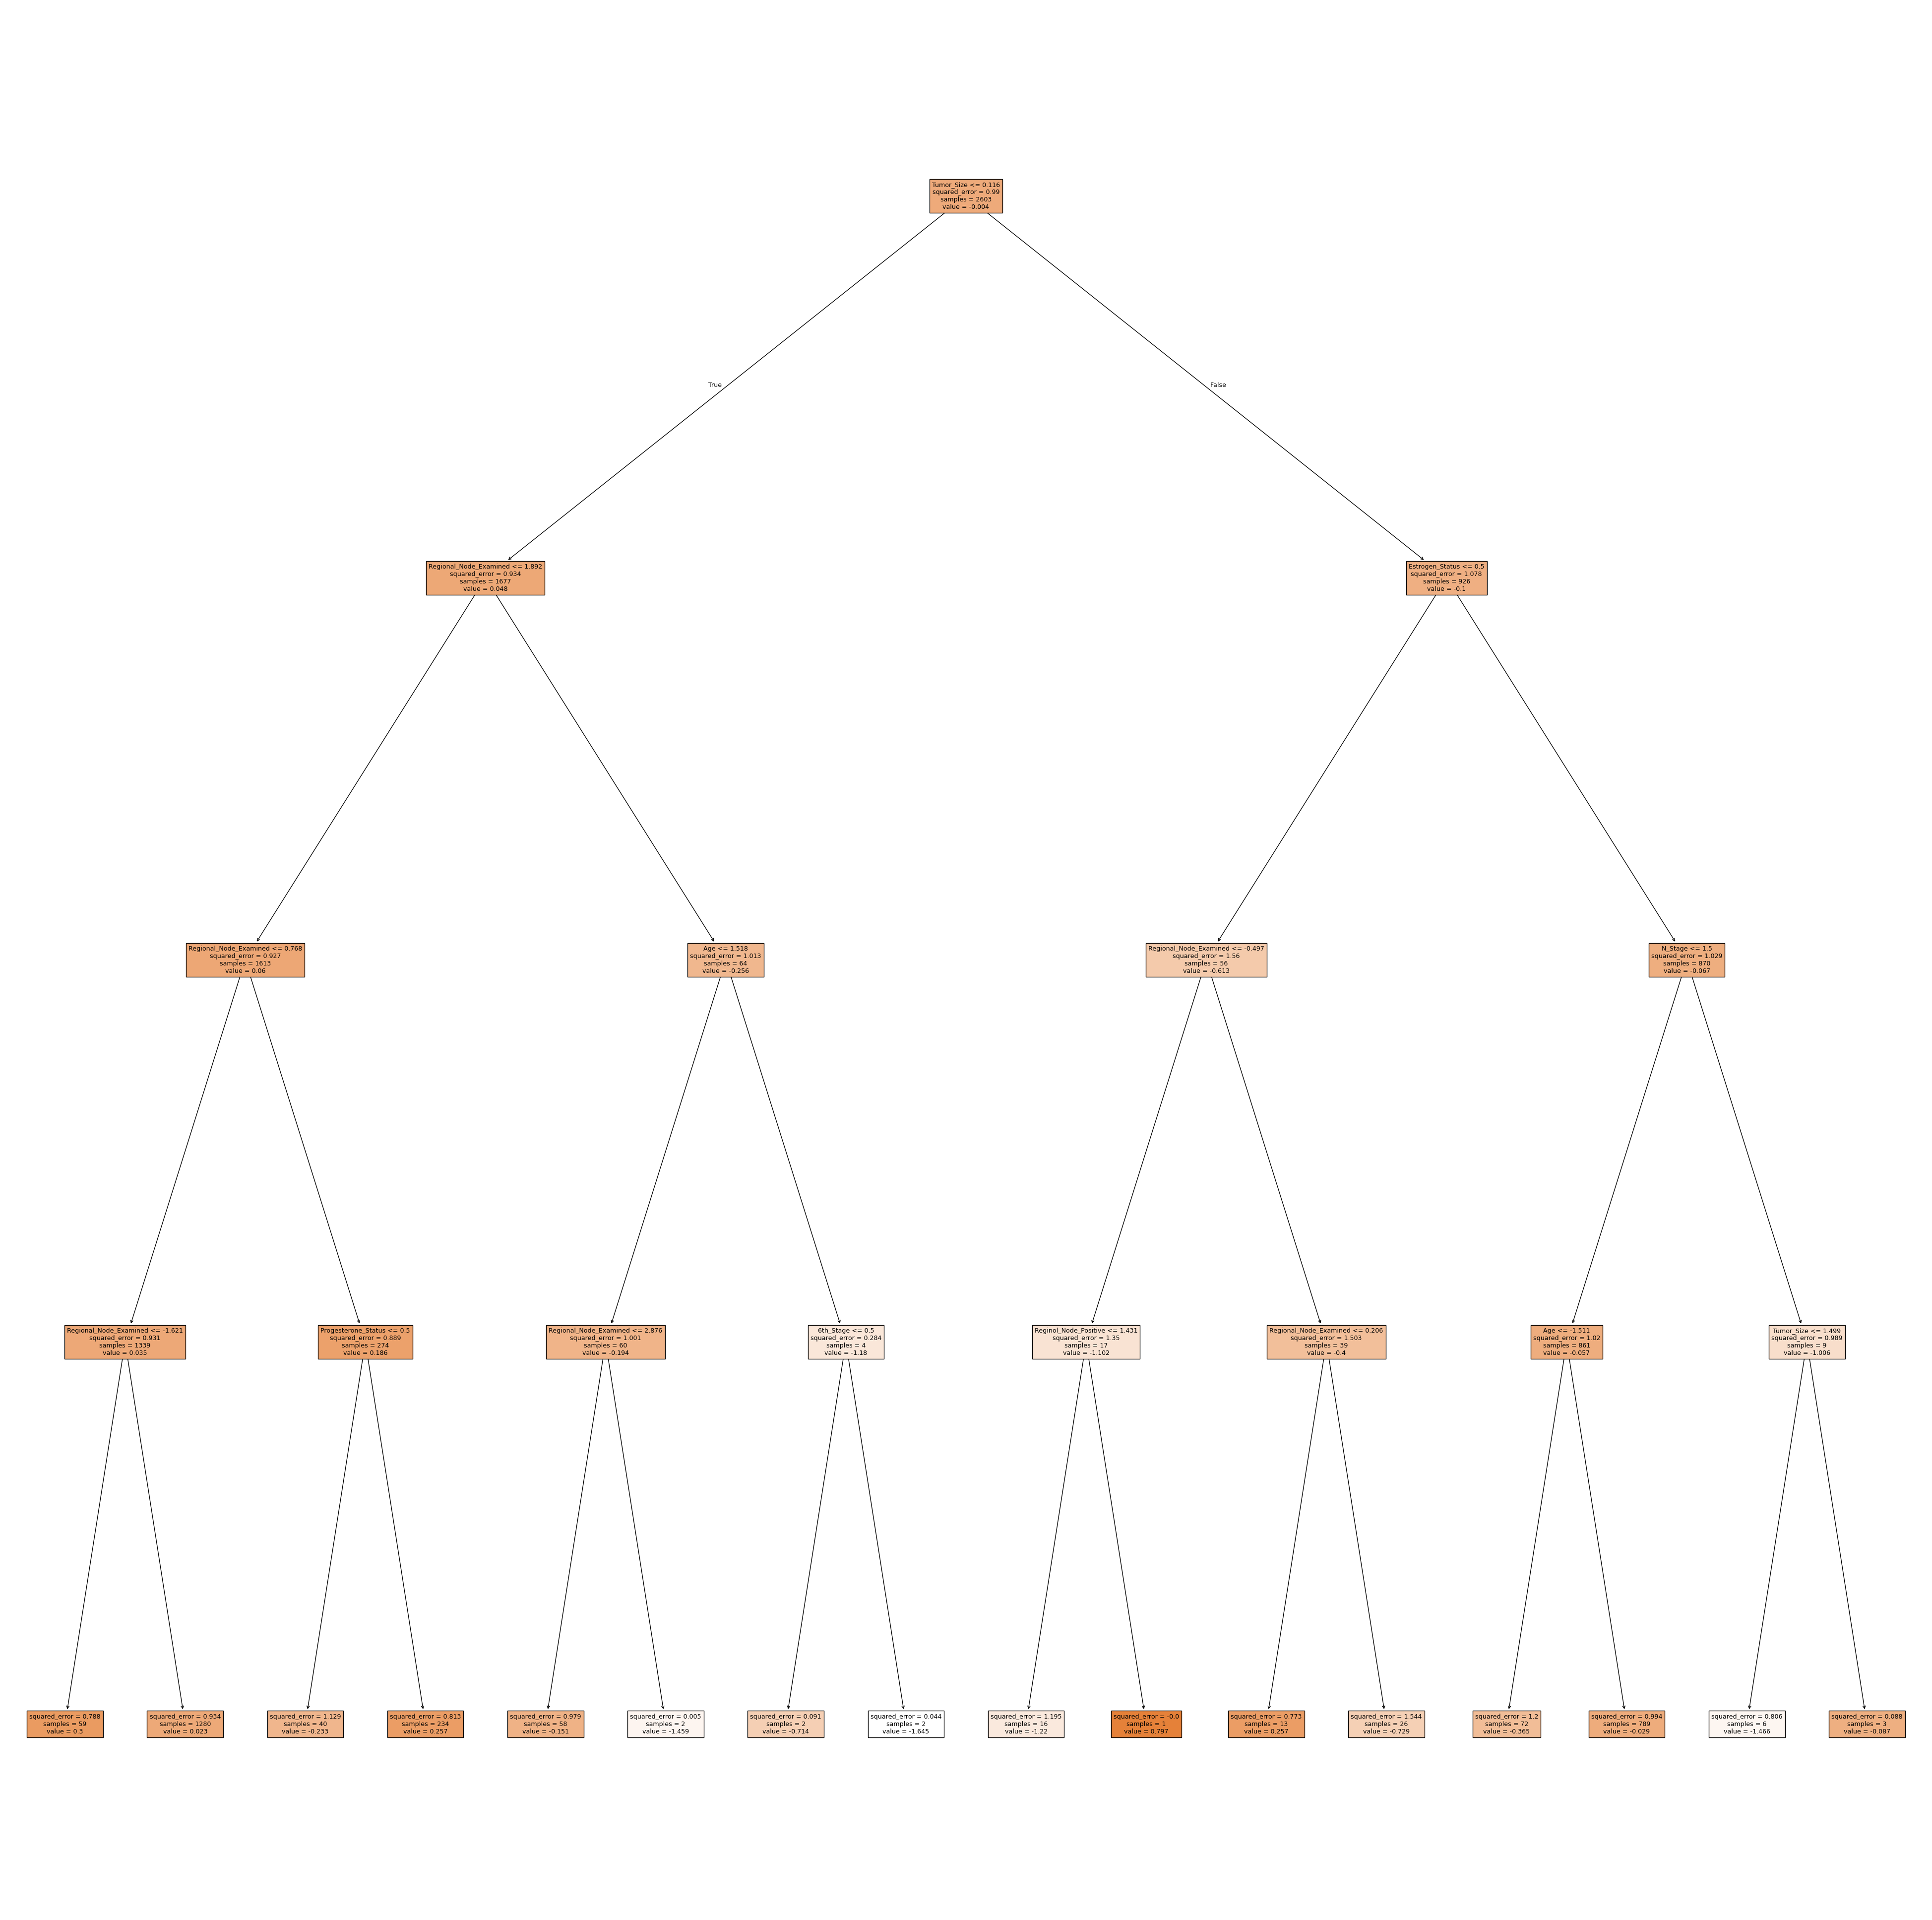

In [42]:
#plot the pruned decision tree
pruned_tree_fig = plt.figure(figsize=(50, 50))
pruned_tree_fig_graph = tree.plot_tree(re_model_pruned, filled=True, feature_names=list(x_train.columns))
#full depth of the tree
print("Full depth of the tree:", re_model_pruned.get_depth())

In [43]:
#evaluate the pruned model
# Calculate the mean squared error
mse_pruned = mean_squared_error(y_test, y_pred_re_pruned)
# Calculate the R-squared score
r2_pruned = r2_score(y_test, y_pred_re_pruned)
# Calculate the mean absolute error
mae_pruned = mean_absolute_error(y_test, y_pred_re_pruned)
#calculate the root mean squared error
rmse_pruned = np.sqrt(mse_pruned)
# Print the evaluation metrics
print("Mean Absolute Error:", mae_pruned)
print("Mean Squared Error:", mse_pruned)
print("R-squared Score:", r2_pruned)
print("Root Mean Squared Error:", rmse_pruned)


Mean Absolute Error: 0.8488747903820667
Mean Squared Error: 1.026040524808628
R-squared Score: 0.012351465663404837
Root Mean Squared Error: 1.012936584791283


In [44]:
#create a comparison dataframe
comparison_df  = pd.DataFrame({
    'Metric': ['Mean Absolute Error', 'Mean Squared Error', 'R-squared Score', 'Root Mean Squared Error'],
    'Unpruned Model': [mae, mse, r2, rmse],
    'Pruned Model': [mae_pruned, mse_pruned, r2_pruned, rmse_pruned]
})
comparison_df.set_index('Metric', inplace=True)
comparison_df

Unpruned Model  Pruned Model
Metric                                               
Mean Absolute Error            1.115799      0.848875
Mean Squared Error             1.949311      1.026041
R-squared Score               -0.876373      0.012351
Root Mean Squared Error        1.396177      1.012937

build a ensemble voting classifier for mortality status predictions 

In [62]:
#import the dataset for mortality prediction
mortality_df = pd.read_csv('mortality_prediction_dataset.csv')
mortality_df.head()

Age  Sex  T_Stage  N_Stage  6th_Stage  Differentiated  Grade  A_Stage  \
0  1.574258    0        0        0          0               1      3        1   
1 -0.445222    0        1        1          2               0      2        1   
2  0.452325    0        2        2          4               0      2        1   
3  0.452325    0        0        0          0               1      3        1   
4 -0.781802    0        1        0          1               1      3        1   

   Tumor_Size  Estrogen_Status  Progesterone_Status  Regional_Node_Examined  \
0   -1.508826                1                    1                1.540617   
1    0.634794                1                    1                0.135463   
2    2.570968                1                    1                0.135463   
3   -0.540740                1                    1               -1.550721   
4    1.049689                1                    1               -1.410206   

   Reginol_Node_Positive  Mortality_Status  
0              -0.777956                 0  
1               1.430524                 0  
2               2.534764                 0  
3              -0.777956                 0  
4              -0.777956                 0

In [63]:
#split the dataset into training and testing data
x_mortality = mortality_df.drop(columns=['Mortality_Status'],axis=1)
y_mortality = mortality_df['Mortality_Status']
#split the dataset into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_mortality, y_mortality, test_size=0.2, random_state=42)

In [64]:
#Building a k-Nearest-Neighbours (kNN) Model 
from sklearn.neighbors import KNeighborsClassifier
# Create a kNN model
knn_model = KNeighborsClassifier()
# Train the model
knn_model.fit(x_train, y_train)
# Make a prediction on the test data
y_pred_knn = knn_model.predict(x_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       582
           1       0.05      0.01      0.02        69

    accuracy                           0.87       651
   macro avg       0.47      0.49      0.48       651
weighted avg       0.80      0.87      0.83       651



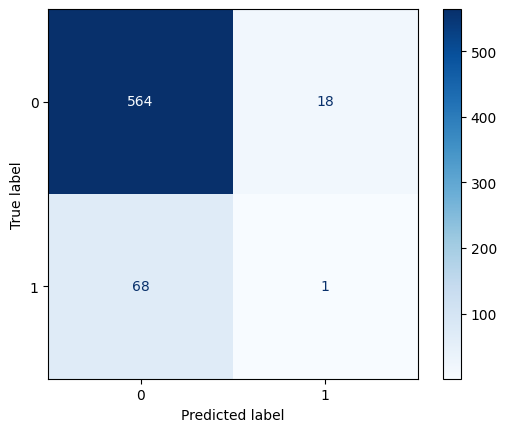

In [65]:
#evaluate the model byt using confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
# Create a classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_knn))
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()

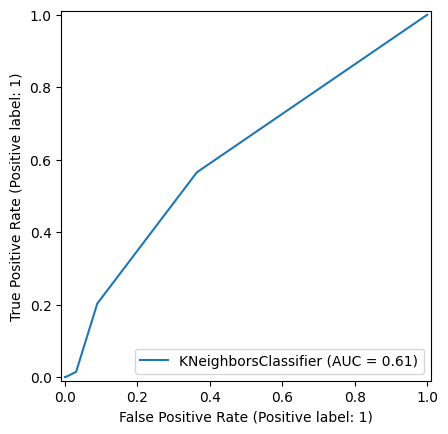

In [66]:
#Roc curve
from sklearn.metrics import RocCurveDisplay
# Create a ROC curve display
knn_disp = RocCurveDisplay.from_estimator(knn_model, x_test, y_test)


In [67]:
#build a Logistic Regression model
from sklearn.linear_model import LogisticRegression
#create a lr model
lr_model = LogisticRegression()
#train the model
lr_model.fit(x_train, y_train)
#make a prediction on the test data
y_pred_lr = lr_model.predict(x_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       582
           1       0.33      0.01      0.03        69

    accuracy                           0.89       651
   macro avg       0.61      0.51      0.49       651
weighted avg       0.84      0.89      0.85       651



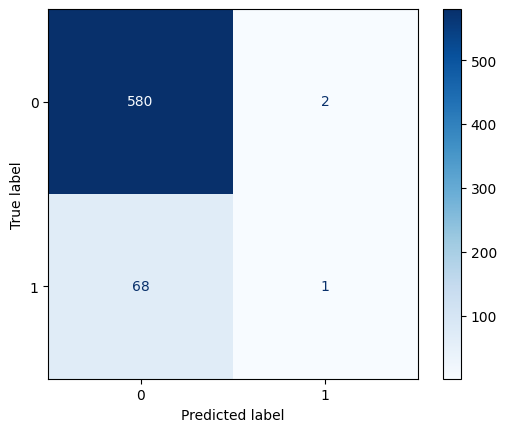

In [71]:
#evaluate the model byt using confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
# Create a classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_lr))
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()


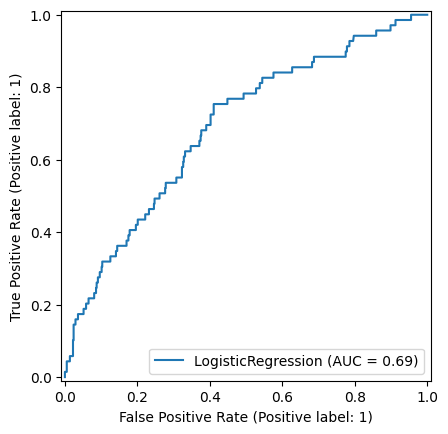

In [72]:
#Roc curve
from sklearn.metrics import RocCurveDisplay
# Create a ROC curve display
lr_disp = RocCurveDisplay.from_estimator(lr_model, x_test, y_test)

In [73]:
#voting classifier
from sklearn.ensemble import VotingClassifier  
# Create a voting classifier
voting_model = VotingClassifier(estimators=[('knn', knn_model), ('lr', lr_model)], voting='soft')



Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       582
           1       0.00      0.00      0.00        69

    accuracy                           0.89       651
   macro avg       0.45      0.50      0.47       651
weighted avg       0.80      0.89      0.84       651



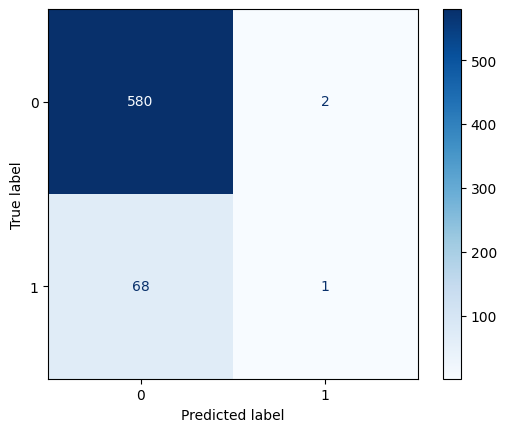

In [74]:
#fit the voting classifier
voting_model=voting_model.fit(x_train, y_train)
#make a prediction on the test data
y_pred_voting = voting_model.predict(x_test)
#evaluate the model byt using confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
# Create a classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_voting))
# Create a confusion matrix
cm_voting = confusion_matrix(y_test, y_pred_voting)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_model.classes_)
# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()

